In [2]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import dataset
ds=pd.read_csv("new_cleaned_car_data.csv")
ds

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000,Petrol
1,3,Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000,Petrol
2,4,EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000,Diesel
3,6,Figo,Ford,2012,175000.0,41000,Diesel
4,7,Eon,Hyundai,2013,190000.0,25000,Petrol
...,...,...,...,...,...,...,...
646,883,Suzuki Ritz VXI ABS,Maruti,2011,270000.0,50000,Petrol
647,885,Indica V2 DLE BS III,Tata,2009,110000.0,30000,Diesel
648,886,Corolla Altis,Toyota,2009,300000.0,132000,Petrol
649,888,Zest XM Diesel,Tata,2018,260000.0,27000,Diesel


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  651 non-null    int64  
 1   name        651 non-null    object 
 2   company     651 non-null    object 
 3   year        651 non-null    int64  
 4   Price       651 non-null    float64
 5   kms_driven  651 non-null    int64  
 6   fuel_type   651 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 35.7+ KB


In [5]:
ds = ds.loc[:, ~ds.columns.str.contains('^Unnamed')]                # removing unnamed column
ds

,name,company,year,Price,kms_driven,fuel_type
0,Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000,Petrol
1,Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000,Petrol
2,EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000,Diesel
3,Figo,Ford,2012,175000.0,41000,Diesel
4,Eon,Hyundai,2013,190000.0,25000,Petrol
...,...,...,...,...,...,...
646,Suzuki Ritz VXI ABS,Maruti,2011,270000.0,50000,Petrol
647,Indica V2 DLE BS III,Tata,2009,110000.0,30000,Diesel
648,Corolla Altis,Toyota,2009,300000.0,132000,Petrol
649,Zest XM Diesel,Tata,2018,260000.0,27000,Diesel


# Distribution of Car Prices

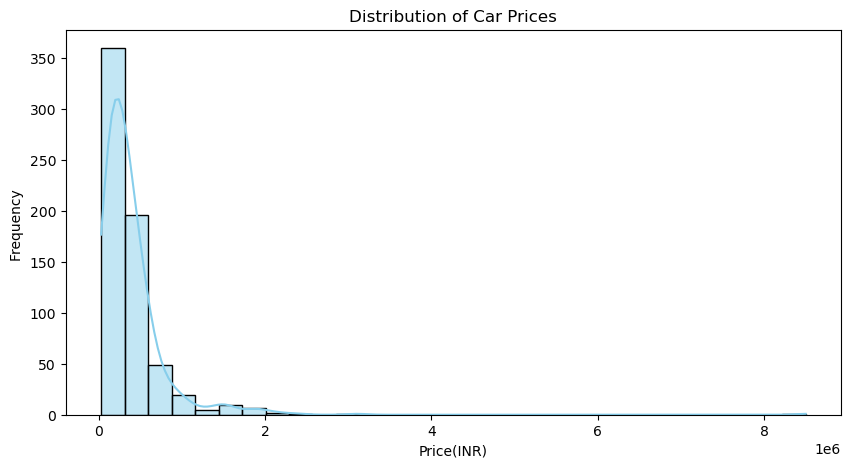

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(ds['Price'],bins=30,kde=True,color='skyblue')
plt.title("Distribution of Car Prices")
plt.xlabel("Price(INR)")
plt.ylabel("Frequency ")
plt.show()

Intepretation : The graph shows how car prices are spread. A right-skew indicates most cars are in the lower price range 

# Cara by Manufacturing Year

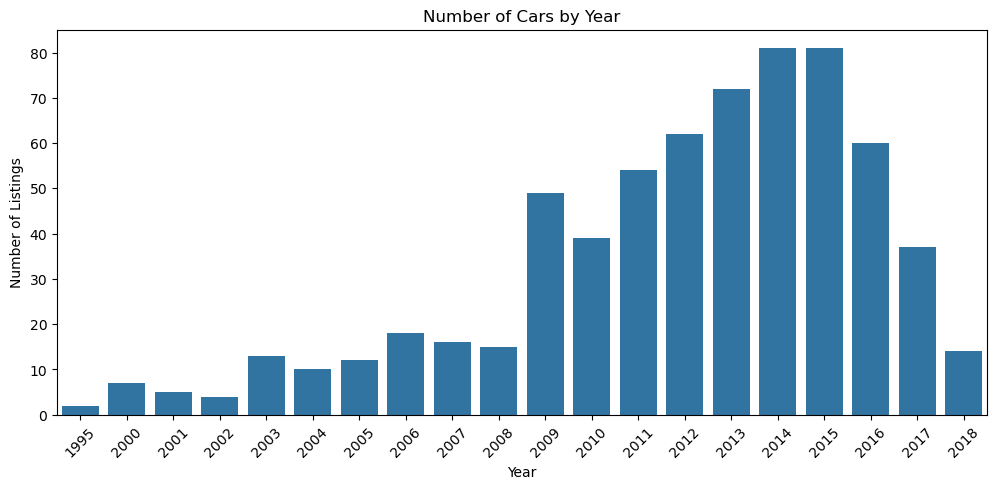

In [10]:
plt.figure(figsize=(12,5))
sns.countplot(data=ds,x='year',order=sorted(ds['year'].unique()))
plt.xticks(rotation=45)
plt.title('Number of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.show()

Interpretion:Most listed cars are from recent years .Older cars are fewer due to wear or less demand

# KMs Driven vs. Price (Scatter Plot)

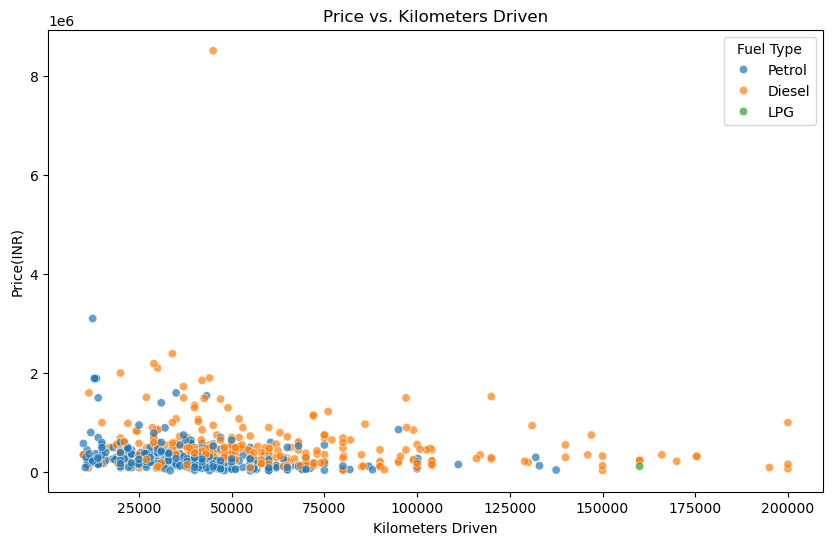

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=ds,x='kms_driven',y='Price',hue='fuel_type',alpha=0.7)
plt.title('Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price(INR)')
plt.legend(title='Fuel Type')
plt.show()

Interpretation:
Price generally drops as the kilometers increase. Fuel type may also influence price trends.

# Top 10 Most Listed Car Brands

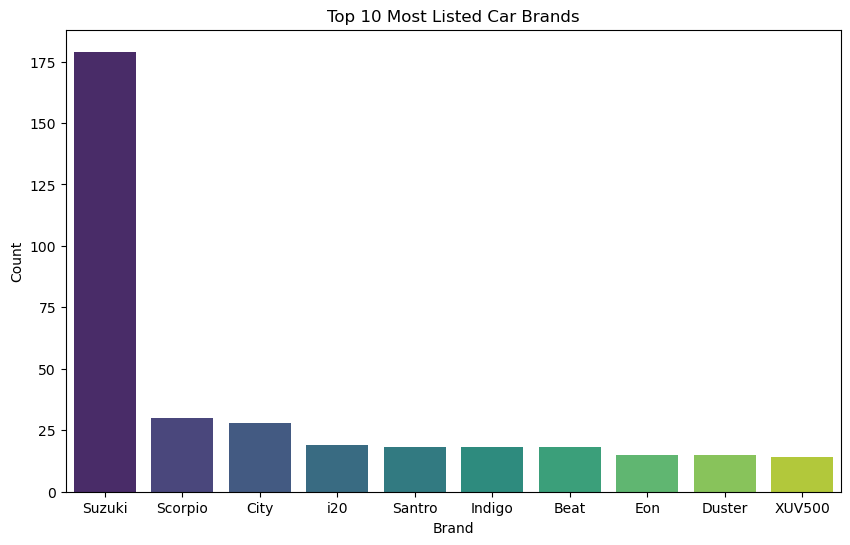

In [15]:
ds['brand'] = ds['name'].str.split().str[0]  # Extract brand

top_brands = ds['brand'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')
plt.title('Top 10 Most Listed Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

 Interpretation:
These are the most common car brands sold on the platform. Helps understand market trends. Suzuki is the most demanding brand.

# Price Comparison of Top Brands (Boxplot)

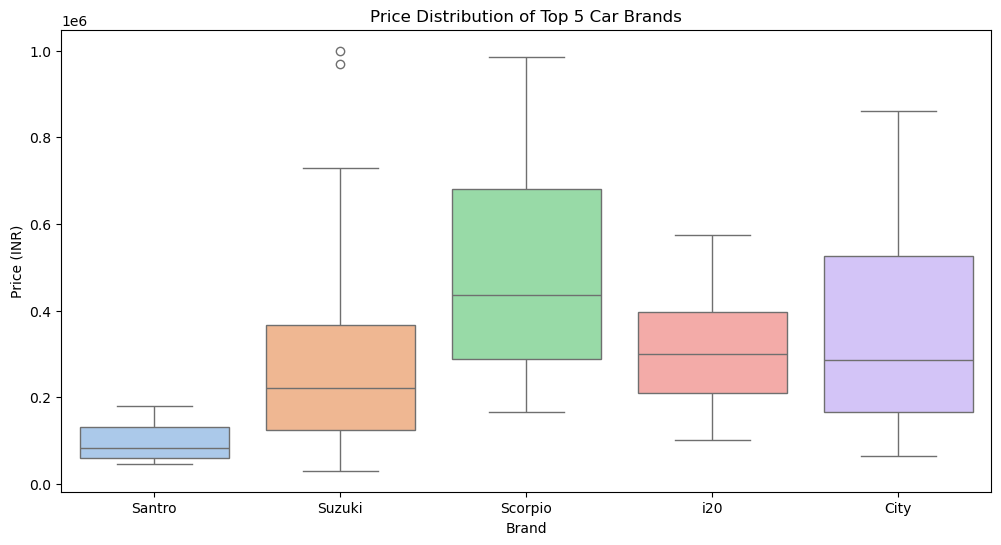

In [18]:
top5 = ds['brand'].value_counts().head(5).index
plt.figure(figsize=(12,6))
sns.boxplot(data=ds[ds['brand'].isin(top5)], x='brand', y='Price', palette='pastel')
plt.title('Price Distribution of Top 5 Car Brands')
plt.xlabel('Brand')
plt.ylabel('Price (INR)')
plt.show()

 Interpretation:
 
This shows the price range and outliers per brand. Some brands have higher price variability.
Santro targets the lower-budget segment.
City and Scorpio Brand attract premium buyyers, these brands may have more models/variants.

# Fuel Type Distribution

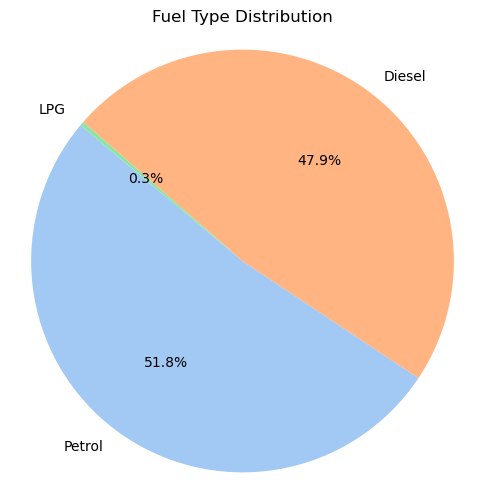

In [20]:
fuel_counts = ds['fuel_type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Fuel Type Distribution')
plt.axis('equal')  # Equal aspect ratio
plt.show()

Interpretation:
It Reveals fuel types Petrol is most common among listed cars.

# Average Price by Fuel Type

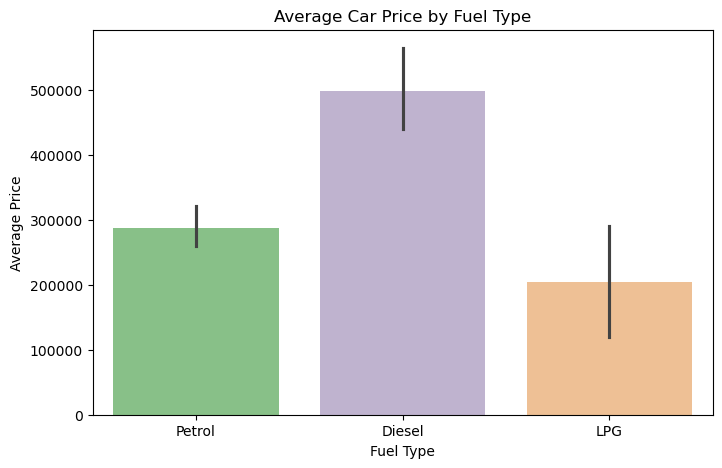

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(data=ds, x='fuel_type', y='Price', estimator='mean', palette='Accent')
plt.title('Average Car Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()


 Interpretation:
Reveals which fuel type tends to have higher average price. Diesel or hybrid cars may often be priced higher.

# Relationship Between Year and Price

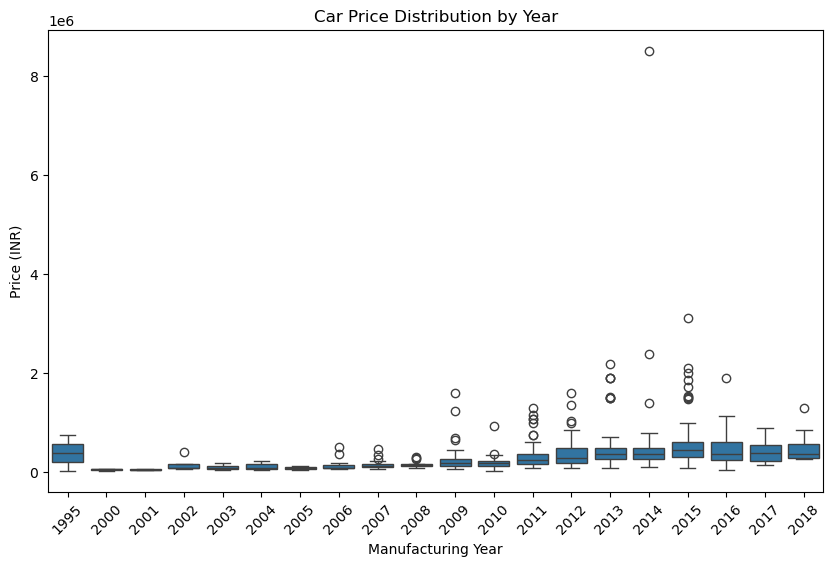

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(data=ds, x='year', y='Price')
plt.xticks(rotation=45)
plt.title('Car Price Distribution by Year')
plt.xlabel('Manufacturing Year')
plt.ylabel('Price (INR)')
plt.show()

 Interpretation:
Shows how price varies with car age. Usually, newer models have higher prices.

# Price Trend Over Years (Mean Price per Year)

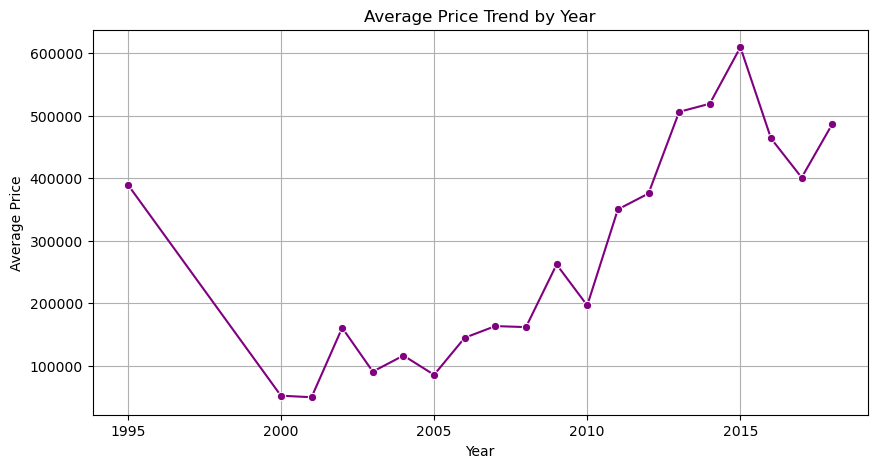

In [26]:
avg_price_by_year = ds.groupby('year')['Price'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=avg_price_by_year, x='year', y='Price', marker='o', color='purple')
plt.title('Average Price Trend by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

Interpretation:
Helps identify how car prices have changed over the years. Useful for trend analysis.

# Correlation Heatmap

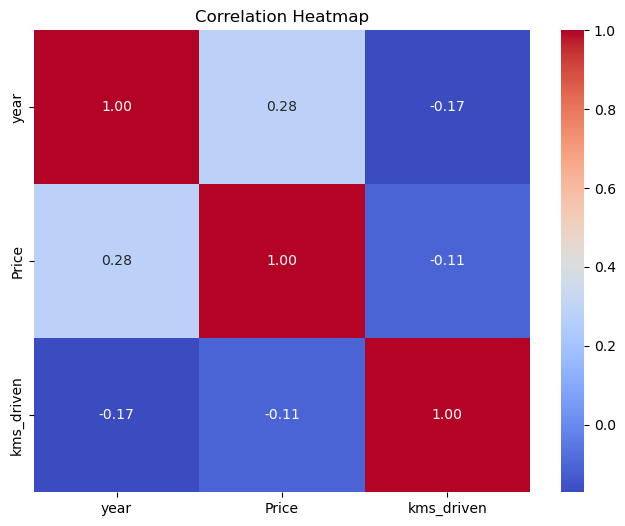

In [28]:
plt.figure(figsize=(8,6))
numeric_cols = ds.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Interpretation:
Shows correlation between numeric variables like price, mileage, year, kms driven. Useful to identify predictive features.
As manufacturing increases, the price also increases.
The more a car is driven, the lower its resale value.